Simplified Route Optimization Demo

The shortest route from Cape Town to Shanghai is:
Cape Town -> Port Elizabeth -> Singapore -> Shanghai
Total distance: 7860 nautical miles


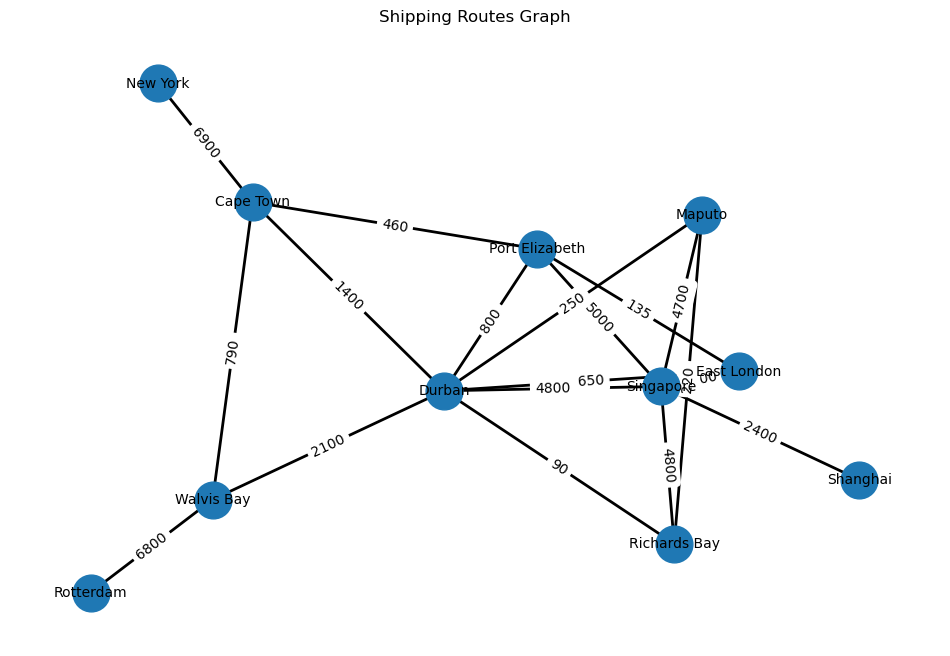

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the ports and routes
ports = [
    'Durban',
    'Cape Town',
    'Port Elizabeth',
    'East London',
    'Richards Bay',
    'Walvis Bay',
    'Maputo',
    'Singapore',
    'Rotterdam',
    'Shanghai',
    'New York'
]

# Create a graph
G = nx.Graph()

# Add nodes (ports)
for port in ports:
    G.add_node(port)

# Simulate distances between ports (in nautical miles)
routes = [
    ('Durban', 'Cape Town', 1400),
    ('Durban', 'Port Elizabeth', 800),
    ('Durban', 'East London', 650),
    ('Cape Town', 'Port Elizabeth', 460),
    ('Port Elizabeth', 'East London', 135),
    ('Durban', 'Richards Bay', 90),
    ('Richards Bay', 'Maputo', 220),
    ('Cape Town', 'Walvis Bay', 790),
    ('Walvis Bay', 'Rotterdam', 6800),
    ('Durban', 'Singapore', 4800),
    ('Singapore', 'Shanghai', 2400),
    ('Durban', 'Maputo', 250),
    ('Cape Town', 'New York', 6900),
    ('Port Elizabeth', 'Singapore', 5000),
    ('East London', 'Singapore', 4900),
    ('Maputo', 'Singapore', 4700),
    ('Richards Bay', 'Singapore', 4800),
    ('Durban', 'Walvis Bay', 2100)
]

# Add edges with distances
for route in routes:
    G.add_edge(route[0], route[1], weight=route[2])

# Function to find the shortest route
def find_shortest_route(G, start_port, end_port):
    try:
        shortest_distance = nx.dijkstra_path_length(G, start_port, end_port, weight='weight')
        shortest_path = nx.dijkstra_path(G, start_port, end_port, weight='weight')
        return shortest_distance, shortest_path
    except nx.NetworkXNoPath:
        return None, None

# Example Usage
start_port = 'Cape Town'
end_port = 'Shanghai'

distance, path = find_shortest_route(G, start_port, end_port)

if path:
    print(f"The shortest route from {start_port} to {end_port} is:")
    print(" -> ".join(path))
    print(f"Total distance: {distance} nautical miles")
else:
    print(f"No available route from {start_port} to {end_port}.")

# Optional: Visualize the graph
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(12,8))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Shipping Routes Graph")
plt.axis('off')
plt.show()
